In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [2]:
# Loading in the diabetes dataset
diabetes = datasets.load_diabetes()

In [3]:
# Creating the diabetes `data` dataset as a dataframe
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Include the target as well
df['target'] = diabetes.target

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [6]:
# train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

# train: 0.6 | validation: 0.2
df_train, df_val = train_test_split(df_train, test_size=0.25, random_state=0)

# Final dataset sizes: train: 0.6, validation: 0.2, text: 0.2

In [7]:
# How does the model perform on the entire dataset and default model parameters
reg = Ridge().fit(df[diabetes.feature_names], df["target"])
all_df_score = reg.score(df[diabetes.feature_names], df["target"])
all_df_score

0.4512313946799055

In [8]:
# How does the model perform on the training dataset and default model parameters
# Remember we use the validation dataset score the model
reg = Ridge().fit(df_train[diabetes.feature_names], df_train["target"])
val_df_score = reg.score(df_train[diabetes.feature_names], df_train["target"])
val_df_score

0.4426772861175259

In [10]:
# How does the model perform on the training dataset and different model parameters
# Change alpha, solver, and max_iter

#Take 1
reg_h_test1 = Ridge(solver='svd', max_iter=10, alpha=0.5).fit(df_train[diabetes.feature_names], df_train["target"])
val_df_h_score_test1 = reg_h_test1.score(df_train[diabetes.feature_names], df_train["target"])
val_df_h_score_test1

0.5002941498347664

In [11]:
#Take 2
reg_h_test2 = Ridge(solver='sag', max_iter=20, alpha=0.1).fit(df_train[diabetes.feature_names], df_train["target"])
val_df_h_score_test2 = reg_h_test2.score(df_train[diabetes.feature_names], df_train["target"])
val_df_h_score_test2

0.5507072538378098

In [12]:
# Used optimized model on the held out test dataset.
test_df_h_score = reg_h_test2.score(df_test[diabetes.feature_names], df_test["target"])
test_df_h_score

0.3574039680096748

<AxesSubplot: title={'center': 'R2 Score of Ridge Model'}>

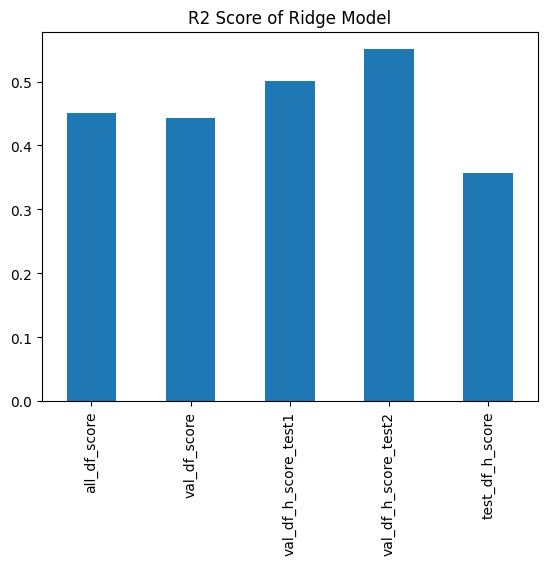

In [14]:
# Bar plot of all scores from each model fit:
pd.Series({
            "all_df_score":all_df_score, 
            "val_df_score":val_df_score,
            "val_df_h_score_test1":val_df_h_score_test1, 
            "val_df_h_score_test2":val_df_h_score_test2,
            "test_df_h_score":test_df_h_score}).plot(kind="bar", legend=False, title="R2 Score of Ridge Model")